**Interesante**: traduccion http://www.mn.uio.no/ifi/english/research/groups/ltg/news/new-corpus-release%3A-opensubtitles-2016.html

* 1 redes recurrentes en series de tiempo  

* 2 Redes recurrentes sobre texto  
    * quora (2 sentences) https://medium.com/mlreview/implementing-malstm-on-kaggles-quora-question-pairs-competition-8b31b0b16a07  
    * clasificacion de texto con CNN - https://www.kaggle.com/eliotbarr/text-mining-with-sklearn-keras-mlp-lstm-cnn  con ese mismo dataset autocompletar (puede generar despues) https://chunml.github.io/ChunML.github.io/project/Creating-Text-Generator-Using-Recurrent-Neural-Network/
https://machinelearningmastery.com/text-generation-lstm-recurrent-neural-networks-python-keras/
    * Annotation text https://www.kaggle.com/abhinavwalia95/entity-annotated-corpus/data

* 3 Autoencoder  
* 4 regulerazacion en CNN -meter batch normalization con transferlearning

Para cambiar batch size de red: https://machinelearningmastery.com/use-different-batch-sizes-training-predicting-python-keras/

In [2]:
import numpy as np
import pandas as pd
folder = './entity-annotated-corpus'

df_ner = pd.read_csv(folder+"/ner.csv", error_bad_lines=False)
df_ner.dropna(inplace=True)
#df_ner.drop(['Unnamed: 0', 'sentence_idx', 'tag'], axis=1,inplace=True)
df_ner.head()

Skipping line 281837: expected 25 fields, saw 34



,Unnamed: 0,lemma,next-lemma,next-next-lemma,next-next-pos,next-next-shape,next-next-word,next-pos,next-shape,next-word,...,prev-prev-lemma,prev-prev-pos,prev-prev-shape,prev-prev-word,prev-shape,prev-word,sentence_idx,shape,word,tag
0,0,thousand,of,demonstr,NNS,lowercase,demonstrators,IN,lowercase,of,...,__start2__,__START2__,wildcard,__START2__,wildcard,__START1__,1.0,capitalized,Thousands,O
1,1,of,demonstr,have,VBP,lowercase,have,NNS,lowercase,demonstrators,...,__start1__,__START1__,wildcard,__START1__,capitalized,Thousands,1.0,lowercase,of,O
2,2,demonstr,have,march,VBN,lowercase,marched,VBP,lowercase,have,...,thousand,NNS,capitalized,Thousands,lowercase,of,1.0,lowercase,demonstrators,O
3,3,have,march,through,IN,lowercase,through,VBN,lowercase,marched,...,of,IN,lowercase,of,lowercase,demonstrators,1.0,lowercase,have,O
4,4,march,through,london,NNP,capitalized,London,IN,lowercase,through,...,demonstr,NNS,lowercase,demonstrators,lowercase,have,1.0,lowercase,marched,O


In [14]:
df_ner.shape

(1050794, 25)

In [54]:
df_ner.columns

Index([u'lemma', u'next-lemma', u'next-next-lemma', u'next-next-pos',
       u'next-next-shape', u'next-next-word', u'next-pos', u'next-shape',
       u'next-word', u'pos', u'prev-iob', u'prev-lemma', u'prev-pos',
       u'prev-prev-iob', u'prev-prev-lemma', u'prev-prev-pos',
       u'prev-prev-shape', u'prev-prev-word', u'prev-shape', u'prev-word',
       u'shape', u'word'],
      dtype='object')

In [3]:
dataset = df_ner.loc[:,["lemma","pos","tag","prev-iob"]]#porque lemma y no word?
dataset.head()

,lemma,pos,tag,prev-iob
0,thousand,NNS,O,__START1__
1,of,IN,O,O
2,demonstr,NNS,O,O
3,have,VBP,O,O
4,march,VBN,O,O


In [4]:
sentence = []
label_sentence = []

47959 sentencias etiquetadas con tagger

In [5]:
#load data into shape 
dataX,dataY = [],[]
datos = 0
#uniques
lemmas = []
labels = []
for fila in dataset.values:
    if fila[-1]=="__START1__": 
        dataX.append(np.asarray(sentence))
        dataY.append(np.asarray(label_sentence))
        sentence= []
        label_sentence = []
        datos+=1
    lemmas.append(fila[0])
    labels.append(fila[1])
    sentence.append(fila[0])#add lemma
    label_sentence.append(fila[1]) #POS o TAG
lemmas = list(set(lemmas)) 
labels = list(set(labels))
#data to 
dataX = np.asarray(dataX[1:])
dataY = np.asarray(dataY[1:])
    
print(datos)  

#array = [ejemplos,timestepts=largo,wordembeding]

48082


In [234]:
dataX

array([array(['thousand', 'of', 'demonstr', 'have', 'march', 'through', 'london',
       'to', 'protest', 'the', 'war', 'in', 'iraq', 'and', 'demand',
       'the', 'withdraw', 'of', 'british', 'troop', 'from', 'that',
       'countri', '.'], dtype='|S8'),
       array(['famili', 'of', 'soldier', 'kill', 'in', 'the', 'conflict', 'join',
       'the', 'protest', 'who', 'carri', 'banner', 'with', 'such',
       'slogan', 'as', '"', 'bush', 'number', 'one', 'terrorist', '"',
       'and', '"', 'stop', 'the', 'bomb', '.', '"'], dtype='|S9'),
       array(['they', 'march', 'from', 'the', 'hous', 'of', 'parliament', 'to',
       'a', 'ralli', 'in', 'hyde', 'park', '.'], dtype='|S10'),
       ...,
       array(['indian', 'offici', 'said', 'no', 'one', 'was', 'injur', 'in',
       'saturday', "'s", 'incid', 'but', 'that', 'two', 'of', 'the',
       'rocket', 'land', 'near', 'a', 'border', 'secur', 'outpost', '.'],
      dtype='|S8'),
       array(['two', 'more', 'land', 'in', 'field', 'belong'

In [14]:
#cantidad de lemas y cantidad de etiquetas
print(len(lemmas))
print(len(labels))

20246
44


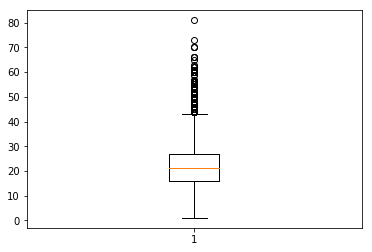

In [161]:
result = map(len, dataX)
import matplotlib.pyplot as plt
%matplotlib inline
plt.boxplot(result)
plt.show()

In [12]:
#Converting words to numbers
lemmas = ["ENDPAD"]+lemmas
labels = ["END"]+labels #agregar caracter espacial para fin de texto
lemma2idx = {w: i for i, w in enumerate(lemmas)}
lab2idx = {t: i for i, t in enumerate(labels)}

In [13]:
max_input_lenght = max(result)
n_lemmas = len(lemmas)
n_labels = len(labels)
max_input_lenght

NameError: name 'result' is not defined

In [3]:
n_labels

NameError: name 'n_labels' is not defined

In [205]:
#example
lemma2idx['obama']

3042

In [217]:
dataX = [[lemma2idx[lemma] for lemma in sentence ] for sentence in dataX]
dataY = [[lab2idx[pos] for pos in pos_tags ] for pos_tags in dataY]

dataY[:5]

[[22,
  34,
  22,
  6,
  31,
  34,
  23,
  17,
  24,
  11,
  14,
  34,
  23,
  27,
  24,
  11,
  14,
  34,
  8,
  22,
  34,
  11,
  14,
  16],
 [22,
  34,
  22,
  31,
  34,
  11,
  14,
  3,
  11,
  22,
  9,
  3,
  22,
  34,
  8,
  22,
  34,
  4,
  23,
  14,
  36,
  14,
  4,
  27,
  4,
  24,
  11,
  22,
  16,
  4],
 [18, 3, 34, 11, 22, 34, 14, 17, 11, 14, 34, 23, 23, 16],
 [22, 3, 11, 14, 34, 22, 34, 36, 34, 22, 3, 18, 3, 36, 16],
 [11,
  14,
  10,
  34,
  11,
  14,
  34,
  11,
  8,
  14,
  34,
  23,
  15,
  2,
  23,
  23,
  34,
  11,
  8,
  8,
  14,
  14,
  34,
  23,
  16]]

In [218]:
from keras.preprocessing import sequence
X = sequence.pad_sequences(dataX, maxlen=max_input_lenght,padding='post',value=lemma2idx["ENDPAD"]) #o pre
X

array([[ 2075, 17581,  5343, ...,     0,     0,     0],
       [ 7753, 17581,  7728, ...,     0,     0,     0],
       [ 5427,  8570, 19165, ...,     0,     0,     0],
       ...,
       [ 3866, 12086, 10840, ...,     0,     0,     0],
       [12861,  2708,  3730, ...,     0,     0,     0],
       [ 5427,  1824,  6696, ...,     0,     0,     0]], dtype=int32)

In [219]:
y = sequence.pad_sequences(dataY, maxlen=max_input_lenght,padding='post',value=lab2idx["END"])
y

array([[22, 34, 22, ...,  0,  0,  0],
       [22, 34, 22, ...,  0,  0,  0],
       [18,  3, 34, ...,  0,  0,  0],
       ...,
       [ 8, 22,  3, ...,  0,  0,  0],
       [36, 40,  3, ...,  0,  0,  0],
       [18,  6, 19, ...,  0,  0,  0]], dtype=int32)

In [222]:
#arreglo tridimensional para etiquetas [ejemplos,palabras,tag en one hot]
from keras.utils import to_categorical
y = np.asarray([to_categorical(i, num_classes=n_labels) for i in y])

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=22)
print("Dimensiones X",X_train.shape)
print("Dimensiones X",X_test.shape)
print("Dimensiones y: ",y_test.shape)

('Dimensiones X', (33656, 81))
('Dimensiones X', (14425, 81))
('Dimensiones y: ', (14425, 81, 42))


In [5]:
#many to many net
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, TimeDistributed, Dropout, Bidirectional

embedding_vector = 32
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
model.add(LSTM(units=100,return_sequences=True))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 15, 10)            100       
_________________________________________________________________
lstm_4 (LSTM)                (None, 15, 100)           44400     
_________________________________________________________________
dense_4 (Dense)              (None, 15, 20)            2020      
_________________________________________________________________
dense_5 (Dense)              (None, 15, 20)            420       
Total params: 46,940
Trainable params: 46,940
Non-trainable params: 0
_________________________________________________________________


NameError: name 'X_train' is not defined

In [241]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:",scores[1])

('Accuracy:', 0.953644436480061)


### Bidirectional

In [242]:
model = Sequential()
model.add(Embedding(input_dim=n_lemmas, output_dim=embedding_vector, input_length=max_input_lenght))
#dropout?
layer_lstm = LSTM(units=100,return_sequences=True)
#LSTM(units=100, return_sequences=True, recurrent_dropout=0.1)
model.add(Bidirectional(layer_lstm))
model.add(Dense(n_labels, activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), nb_epoch=3, batch_size=128)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_12 (Embedding)     (None, 81, 32)            647808    
_________________________________________________________________
bidirectional_3 (Bidirection (None, 81, 200)           106400    
_________________________________________________________________
dense_10 (Dense)             (None, 81, 42)            8442      
Total params: 762,650
Trainable params: 762,650
Non-trainable params: 0
_________________________________________________________________
Train on 33656 samples, validate on 14425 samples
Epoch 1/3
33656/33656 [==============================] - 117s 3ms/step - loss: 0.9675 - acc: 0.7594 - val_loss: 0.7063 - val_acc: 0.8039
Epoch 2/3
33656/33656 [==============================] - 117s 3ms/step - loss: 0.4850 - acc: 0.8707 - val_loss: 0.2533 - val_acc: 0.9348
Epoch 3/3
33656/33656 [==============================] - 117s 3ms/step - los

In [243]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("Accuracy:",scores[1])

('Accuracy:', 0.9673671811168281)


## Use it

In [229]:
i = 0
p = model.predict(np.array([X_test[i]]))
p = np.argmax(p, axis=-1)
print("{:15}: {}".format("Lemma", "Pred"))
for w,pred in zip(X_test[i],p[0]):
    print("{:15}: {}".format(lemmas[w],labels[pred]))

Lemma          : Pred
amnesti        : NNP
also           : RB
accus          : VBD
eritrean       : JJ
prison         : NNS
offici         : NNS
of             : IN
open           : VBG
fire           : NN
on             : IN
detaine        : NNS
at             : IN
the            : DT
adi            : NNP
abeto          : NNP
prison         : NN
dure           : IN
an             : DT
appar          : JJ
escap          : VBD
attempt        : NN
follow         : VBG
the            : DT
arrest         : NN
.              : .
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD         : END
ENDPAD 

## AUTOCOMPLETAR

In [14]:
dataset = df_ner.loc[:,["word","lemma","next-lemma","prev-iob"]]#porque lemma y no word?
dataset.head()

,word,lemma,next-lemma,prev-iob
0,Thousands,thousand,of,__START1__
1,of,of,demonstr,O
2,demonstrators,demonstr,have,O
3,have,have,march,O
4,marched,march,through,O


In [16]:
text = ' '.join(dataset["word"]).lower() #corpus
print(len(text))

6067512


In [18]:
char_indices["$"]

NameError: name 'char_indices' is not defined

In [17]:
null_character = "*"
chars = [null_character]+sorted(list(set(text)))
print('total chars:', len(chars))
char_indices = {c: i for i, c in enumerate(chars)}
indices_char = {i: c for i, c in enumerate(chars)}

# cut the text in semi-redundant sequences of maxlen characters
maxlen = 40
step = 5 
sentences = []
next_chars = []
size = int(len(text)*0.2) #solo un 20% del corpus
for i in range(0, size - maxlen, step):
    sentences.append(null_character+text[i: i + maxlen])
    next_chars.append(text[i + maxlen])
print('nb sequences:', len(sentences))

('total chars:', 72)
('nb sequences:', 242693)


In [125]:
sentences[:5]

['*thousands of demonstrators have marched ',
 '*ands of demonstrators have marched throu',
 '*of demonstrators have marched through lo',
 '*monstrators have marched through london ',
 '*rators have marched through london to pr']

In [126]:
dataX = [[char_indices[char] for char in sentence ] for sentence in sentences]
dataY = [char_indices[char] for char in next_chars]

dataY[:5]

[52, 39, 46, 52, 47]

In [127]:
from keras.preprocessing import sequence
X = sequence.pad_sequences(dataX, maxlen=maxlen+1,padding='pre',value=char_indices[null_character]) 
X.shape

(242693, 41)

In [128]:
#arreglo tridimensional para etiquetas [ejemplos,palabras,tag en one hot]
from keras.utils import to_categorical
y = np.asarray([to_categorical(i, num_classes=len(chars)) for i in dataY])
y.shape

(242693, 72)

In [182]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding, Dense, Dropout,CuDNNGRU

embedding_vector = 16
model = Sequential()
#model.add(Input(batch_shape=(256,maxlen+1)))
model.add(Embedding(input_dim=len(chars), output_dim=embedding_vector, input_length=maxlen+1))#
#model.add(CuDNNGRU(units=32,return_sequences=True)) 
model.add(CuDNNGRU(units=512,return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(len(chars), activation='softmax'))
model.summary()
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_35 (Embedding)     (None, 41, 16)            1152      
_________________________________________________________________
cu_dnngru_27 (CuDNNGRU)      (None, 512)               814080    
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_38 (Dense)             (None, 72)                36936     
Total params: 852,168
Trainable params: 852,168
Non-trainable params: 0
_________________________________________________________________


In [183]:
"""
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)
"""

def predict_next_char(model, sentence, diversity=1.0):
    """Predict the next character from the current one"""    
    x_pred = [char_indices[null_character]]+[char_indices[char] for char in sentence]
    x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[null_character])
    preds = model.predict(x_pred, verbose=0)[0]
    #next_index = sample(preds, diversity)
    #next_index = np.argmax(preds)
    next_index = np.random.choice(len(chars), p=preds)
    return indices_char[next_index]

import random,sys
def on_epoch_end(epoch, logs):
    # Function invoked at end of each epoch. Prints generated text.
    print()
    print('----- Generating text after Epoch: %d' % epoch)

    start_index = random.randint(0, len(text) - maxlen - 1)
    #for diversity in [0.2, 0.5, 1.0, 1.2]:
     #   print('----- diversity:', diversity)

    #generated = ''
    sentence = text[start_index: start_index + maxlen]
    #generated += sentence
    print('----- Generating with seed: "' + sentence + '"')
    sys.stdout.write(sentence)

    for i in range(400):
        next_char = predict_next_char(model, sentence)
        sentence = sentence[1:] + next_char #for next character
        sys.stdout.write(next_char)
        sys.stdout.flush()
        
from keras.callbacks import LambdaCallback
print_callback = LambdaCallback(on_epoch_end=on_epoch_end)

model.fit(X, y,batch_size=256,epochs=25, callbacks=[print_callback])

#N = 256*700
#for i in range(25):
#    model.fit(X[:N], y[:N], epochs=1, batch_size=256, verbose=1, shuffle=False,callbacks=[print_callback])
#    model.reset_states()

Epoch 1/25
242693/242693 [==============================] - 33s 134us/step - loss: 2.4705 - acc: 0.2862
()
----- Generating text after Epoch: 0
----- Generating with seed: "h little or no documentation during 2003"
h little or no documentation during 2003 aps angean . the poremith lithlung ja ter of collien palotians fors ala and sotie clunawiot cullo lead ins siburs ind pareistroes . prition cof suntschd ta dimre as insean atedte 36-iscof tish frbizictar as cuna's . ang aes , s5yg reyed to real wass a perestaitidg cneplofr . in suront hist moth etsicial stitions erenn silunit of tourevar hent ir mimany . mationicis joncomt of caterinel e res alelEpoch 2/25
242693/242693 [==============================] - 30s 124us/step - loss: 1.9253 - acc: 0.4317
()
----- Generating text after Epoch: 1
----- Generating with seed: "not want to give the opposition an excus"
not want to give the opposition an excusian gasing a coseing to khind all searling fre the gusting nuply scallunt fil themere ank 

ocrat barack obama released statements for an al-qaida province services head of the siden minister says the delg eastern europe and a ship by consul- . the assassination to baged their warmage until hel constitution and second ligg the move , western makarha chaines a permanent south karmed sutsestian more gand has deneesed was month alolia has cleared not to the virus . masar acinities year attack in southern mil-or president diructio

In [1]:
model.save("text_model.h5")

NameError: name 'model' is not defined

como es por caracter.. puede recibir cualquier palabra

In [6]:
from keras.models import load_model
model = load_model("text_model.h5")

In [7]:
from keras.preprocessing import sequence
def predict_next_char(model, sentence, diversity=1.0):
    """Predict the next character from the current one"""    
    x_pred = [char_indices[null_character]]+[char_indices[char] for char in sentence]
    x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[null_character])
    preds = model.predict(x_pred, verbose=0)[0]
    #next_index = np.random.choice(len(chars), p=preds)
    next_index = np.argmax(preds)
    return indices_char[next_index]
import sys

In [8]:
sentence = "my name is "#"as a mirror, that the deep heavens may !" #rellenar con un simbolo de "null" #
print('----- Generating with seed: "' + sentence + '"')
sys.stdout.write(sentence)
for i in range(400):
    next_char = predict_next_char(model, sentence)
    sentence = sentence[1:] + next_char #for next character
    sys.stdout.write(next_char)
    sys.stdout.flush()

----- Generating with seed: "my name is "
my name is 

NameError: global name 'char_indices' is not defined

In [62]:
indices_char[1]

' '

In [77]:
sentence = "this is a test "

x_pred = [char_indices[end_character]]+[char_indices[char] for char in sentence ]
x_pred = sequence.pad_sequences([x_pred], maxlen=maxlen+1,padding='pre',value=char_indices[end_character])
preds = model.predict(x_pred, verbose=0)[0]

print(np.argmax(preds))

47
